# DQN Banana Collector 
## In an adapted Unity Environment 
---

In [1]:
###follow the links in the readme for setting up the UnityEnvironment
from unityagents import UnityEnvironment
import numpy as np
import os
from collections import deque
from dqn_agent import Agent
import matplotlib.pyplot as plt
import torch
%matplotlib inline


### Load the environment and show some infos
Enter the pathname of the Banana Environment App



In [2]:
path_BananaApp = "../../deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana_Windows_x86_64/Banana.exe"
#if os.path.isfile(path_BananaApp):
    #
    #print ('True')
env = UnityEnvironment(file_name=path_BananaApp)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


The following link offers some general informations about the environment, agents, states,...

https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Python-API.md

---
Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python. Only this one brain is used.


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print (brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Details
#### Actions
---
The single agent (brain) that is used has at each time step four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

#### States
---
The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.

#### Rewards
---
A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

#### Done
---
True if the episode determinates, otherwise Flase

In [4]:
###Examine!
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
print ('Type - states: ', type(state))
state_size = len(state)
print('States have length:', state_size)

# About the rewards
reward = env_info.rewards[0]
print ('A Reward looks like: ', reward)
print ('Type - rewards', type(reward))

#About dones
done = env_info.local_done[0]
print ('Done looks like: ', done)
print ('Type - done: ', type(done))

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
Type - states:  <class 'numpy.ndarray'>
States have length: 37
A Reward looks like:  0.0
Type - rewards <class 'float'>
Done looks like:  False
Type - done:  <class 'bool'>


## Train the agent

In [5]:
###Define all the (Hyper)parameters here
#DNN
list_number_units_hidden = [128,128]
learn_rate = 0.0005
seed = 0

LearningUpdateEvery = 4

#ReplayBuffer
maxlen = 100000
batch_size = 64

#Q-stuff
eps_start = 1.0
eps_min = 0.01
eps_decay = 0.999

gamma = 0.99
tau = 0.001

#Allready defined, but to have all together
action_size = brain.vector_action_space_size
state_size = len(state)

#not to forget
episodes = 3000

In [6]:
#Main Algorithm
#init

def DQN (agent,episodes=episodes,eps_start=eps_start,eps_min=eps_min,eps_decay=eps_decay,train=True):
    score_list = []
    eps = eps_start 
    for episode in range(1,episodes+1):
        #reset env
        env_info = env.reset(train_mode=train)[brain_name]
        #get current state 
        done = env_info.local_done[0]
        score = 0

        while not done:
            state = env_info.vector_observations[0]
            #predict action
            action = agent.act(state, eps)
            #print ("action: {}".format(action))
            #action --> environment
            env_info = env.step(action)[brain_name]
            #new state
            next_state = env_info.vector_observations[0]
            #the reward
            reward = env_info.rewards[0]
            #finally the determinating info
            done = env_info.local_done[0]
            #let the agent take his step
            if train:
                agent.step(state,action,reward,next_state,done,gamma)
            ###score calculation
            score += reward
        score_list.append(score)
        #epsilon update
        if train:
            eps = max(eps_min, eps_decay*eps)
        else:
            eps = 0.0
        #print score
        if episode % 100 == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(episode, np.array(score_list)[-100:].mean()))
        if (np.array(score_list)[-100:].mean()) > 13.0 and train:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(episode, np.array(score_list)[-100:].mean()))
            print("\rEnvironment solved in {} episodes.".format(episode))
            torch.save(agent.Q_local.state_dict(), 'James13_dqn.pth')
            break

    return score_list  

In [7]:
James = Agent(state_size,action_size,list_number_units_hidden,seed,learn_rate,LearningUpdateEvery,maxlen,tau)
score = DQN(James)

Episode 100	Average Score: 0.22
Episode 200	Average Score: 0.48
Episode 300	Average Score: 1.28
Episode 400	Average Score: 2.30
Episode 500	Average Score: 3.09
Episode 600	Average Score: 4.06
Episode 700	Average Score: 4.75
Episode 800	Average Score: 6.27
Episode 900	Average Score: 6.76
Episode 1000	Average Score: 7.28
Episode 1100	Average Score: 8.08
Episode 1200	Average Score: 8.34
Episode 1300	Average Score: 9.09
Episode 1400	Average Score: 9.12
Episode 1500	Average Score: 9.74
Episode 1600	Average Score: 10.03
Episode 1700	Average Score: 11.30
Episode 1800	Average Score: 11.50
Episode 1900	Average Score: 11.52
Episode 2000	Average Score: 10.93
Episode 2100	Average Score: 11.65
Episode 2200	Average Score: 12.44
Episode 2237	Average Score: 13.02
Environment solved in 2237 episodes.


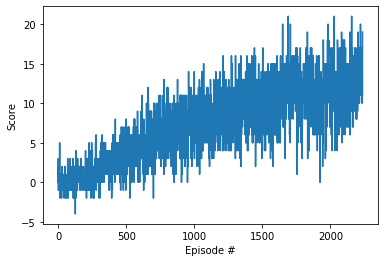

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(score)), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()   

In [9]:
James = Agent(state_size,action_size,list_number_units_hidden,seed,learn_rate,LearningUpdateEvery,maxlen,tau,filename='James13_dqn.pth')
score = DQN(James,episodes=100 , train=False)

Episode 100	Average Score: 12.69


In [10]:
env.close()